# Part II - Loan Data from Prosper Dataset Explanatory Visualization Presentation
## by Isaac Mwendwa

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 

## Dataset Overview

* The Loan Data from Prosper Dataset is a dataset of loans taken between 2005 and 2013 from Prosper
* The dataset contains 113,937 rows (loans) with 81 columns (loan variables) on each row

* The loan variables consist of qualitative (ordinal and nominal) and quantitative features

* The main features of interest (response variables) in the dataset include:
> * Borrower's APR
> * Prosper Score
> * Debt to Income Ratio 

* The variables that will support the investigation of the variables of interest are known as predictor features. They include:
> * Income Range
> * Employment Status
> * Stated Monthly Income
> * Loan Year
> * Employment Duration 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe


#### Mounting Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Defining Path of Working Directory

In [4]:
# Working Directory Path
working_dir = '/content/drive/My Drive/Colab_Notebooks/ALX_3/'

In [5]:
# Reading dataset into Pandas Dataframe

original_loans_df = pd.read_csv(working_dir + "prosperLoanData.csv")

In [6]:
# Making copy of dataset
loans_df = original_loans_df.copy()

In [7]:
# filtering data to remove outliers
loans_clean_df = loans_df[loans_df['StatedMonthlyIncome'] <= 30000]
loans_clean_df.shape

(113610, 81)

In [8]:
# Remove loans with null BorrowerAPR
loans_final_df = loans_clean_df[~loans_df['BorrowerAPR'].isna()]
loans_final_df.shape

(113585, 81)

## Visualization 1: What is the Distribution of Debt-to-Income Ratio?

#### Introduction

Definition: **Debt-to-Income Ratio**


* The Debt-to-Income (DTI) ratio divides a borrower's total monthly debt payments by their gross monthly income
* Lenders use DTI — along with credit history and other factors — to evaluate a borrower's financial ability to repay a loan

#### Plotting Visualization

In [9]:
# Defining min and max of Debt to Income Ratio Column
min = loans_df['DebtToIncomeRatio'].min()
max = loans_df['DebtToIncomeRatio'].max()

print("Min:", min)
print("Max:", max)

Min: 0.0
Max: 10.01


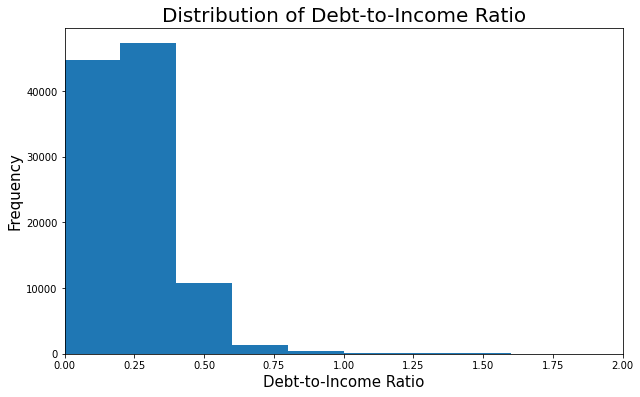

In [10]:
# Plotting histogram with axis limits (0,2), Interval of 0.2

# defining bins to be used
bins = np.arange(min, max + 0.2, 0.2)

# defining size of plot
plt.figure(figsize=(10, 6))

# drawing histogram
plt.hist(data = loans_df, x = 'DebtToIncomeRatio', bins = bins);

# Add title and axis names
plt.title('Distribution of Debt-to-Income Ratio', fontsize = 20)
plt.xlabel('Debt-to-Income Ratio', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# setting X-axis limits
plt.xlim((0,2)); 

#### **Insights from Visualization**

* The distribution is skewed right, implying that the majority of the Debt-to-Income ratios lay between 0 and 0.4
* This implies that lenders pay keen attention to ensure a borrower can service the loan, by ensuring that their Debt-to-Income ratio is low
* A low Debt-to-Icome ratio shows that the borrower has more money at their disposal, and hence they can fully repay the loan taken

## Visualization 2: What is the effect of Employment Status on Borrower APR?



#### Introduction

Definition: **Borrower APR**
* The Borrower's Annual Percentage Rate (APR) for the loan

Definition: **Employment Status**
* The employment status of the borrower at the time they posted the listing

We would like to know the influence of Employment Status on a Borrower's APR in this section.



#### Plotting Visualization

In [11]:
# function to draw violin plot
def draw_violin_plot(df, x_column, y_column):

  # defining size of plot
  sb.set(rc = {'figure.figsize':(11,6)})

  base_color = sb.color_palette()[0]

  ax = sb.violinplot(data=df, x=x_column, y=y_column, color=base_color)
  plt.xticks(rotation=15)

  # returning figure plotted
  return ax

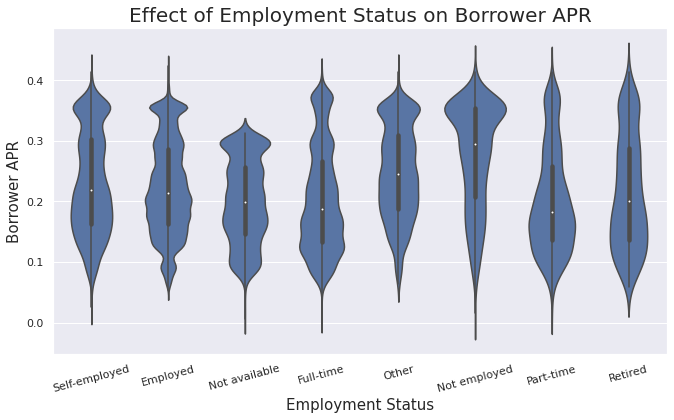

In [12]:
# Calling violin plot drawing function

ax = draw_violin_plot(loans_final_df, 'EmploymentStatus', 'BorrowerAPR');

# adding axis labels and title
ax.set_xlabel('Employment Status', fontsize = 15)
ax.set_ylabel('Borrower APR', fontsize = 15)
ax.set_title("Effect of Employment Status on Borrower APR", fontsize = 20);

#### **Insights from Visualization**

* Borrowers who have "Not Employed" and "Other" as their Employment Statuses have the highest Borrower APR's. 
* This can be attributed to the increased risk of lending such people money; which has to be countered by increasing the APR

## Visualization 3: How does the Loan Original Amount compare with the Income Range?

#### Introduction

Definition: **Loan Original Amount**
* The origination amount of the loan (also known as Loan Principal)

Definition: **Income Range**
* The income range of the borrower at the time the listing was created

In this section, We would like to know the influence of a borrower's Income Range on the Loan Original Amount.



#### Plotting Visualization

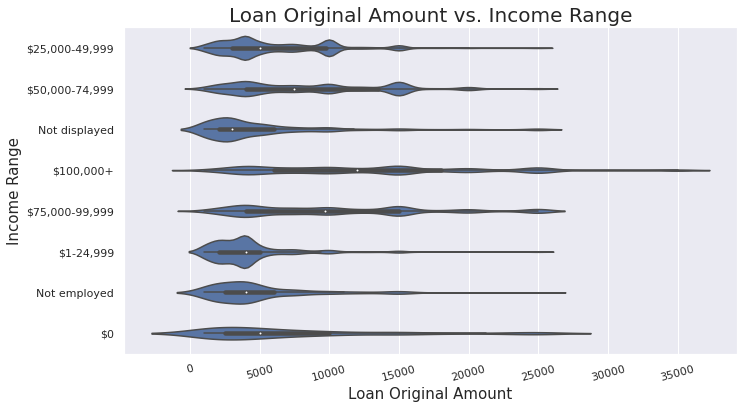

In [13]:
# Calling violin plot drawing function

ax = draw_violin_plot(loans_final_df, 'LoanOriginalAmount', 'IncomeRange')

# adding axis labels and title
ax.set_xlabel('Loan Original Amount', fontsize = 15)
ax.set_ylabel('Income Range', fontsize = 15)
ax.set_title("Loan Original Amount vs. Income Range", fontsize = 20);

#### **Insights from Visualization**


* The plot shows that the people with the highest Loan Original Amount are borrowers in the Income Range of USD 100,000+
* The borrowers with the least Loan Original Amount are in the Income Ranges of "Not employed", "USD 1 - USD 25,000", and "Not Displayed"
* Therefore, there is a positive relationship between the Income Range and the Loan Original Amount
* This implies that the more you earn, the more you can borrow

## Visualization 4: How does the Loan Original Amount relate with Loan Term and Prosper Score?



#### Introduction

Definition: **Prosper Score**
* A custom risk score built using historical Prosper data
* The score ranges from 1-10, with 10 being the best, or lowest risk score

Definition: **Loan Term**
* The length of the loan expressed in months

Definition: **Loan Original Amount**
* The origination amount of the loan (also known as Loan Principal)

We would like to know the influence of Loan Term and Prosper Score on the Loan Original Amount in this section.



#### Plotting Visualization

In [14]:
# Sample few loans for faster correlation plotting
loans_sampled_df = loans_final_df.sample(6000)
loans_sampled_df.shape

(6000, 81)

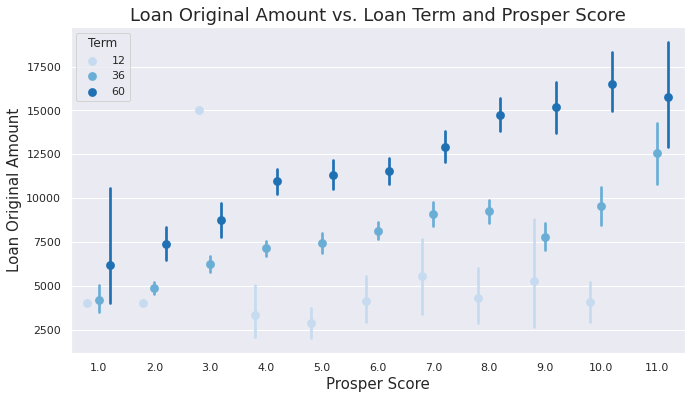

In [15]:
# defining size of plot
sb.set(rc = {'figure.figsize':(11,6)})

# plotting data
ax = sb.pointplot(data = loans_sampled_df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4);

# adding axis labels and title
ax.set_xlabel('Prosper Score', fontsize = 15)
ax.set_ylabel('Loan Original Amount', fontsize = 15)
ax.set_title("Loan Original Amount vs. Loan Term and Prosper Score", fontsize = 18);

#### **Insights from Visualization**

* The key observation from the plot above is that the Loan Original Amount shares a positive relationship with the Prosper Score and the Loan Term  
* The plot shows that the Loan Original Amount increases as the Prosper Score increases, and also as the Loan Term increases
* This can be explained by the fact that for a loan to have a longer term, then the loan original amount (Principal) must be bigger. 
* Additionally, for a borrower to qualify for a bigger loan (and hence a bigger repayment term), then they should have a good (increasing) Prosper Score

## Visualization 5: Effect of Prosper Score on Borrower APR and Loan Original Amount



#### Introduction

Definition: **Borrower APR**
* The Borrower's Annual Percentage Rate (APR) for the loan

Definition: **Prosper Score**
* A custom risk score built using historical Prosper data. 
* The score ranges from 1-10, with 10 being the best, or lowest risk score

Definition: **Loan Original Amount**
* The origination amount of the loan (also known as Loan Principal)

We would like to know the influence of Prosper Score on a Borrower's APR and the Loan Original Amount in this section.



#### Plotting Visualization

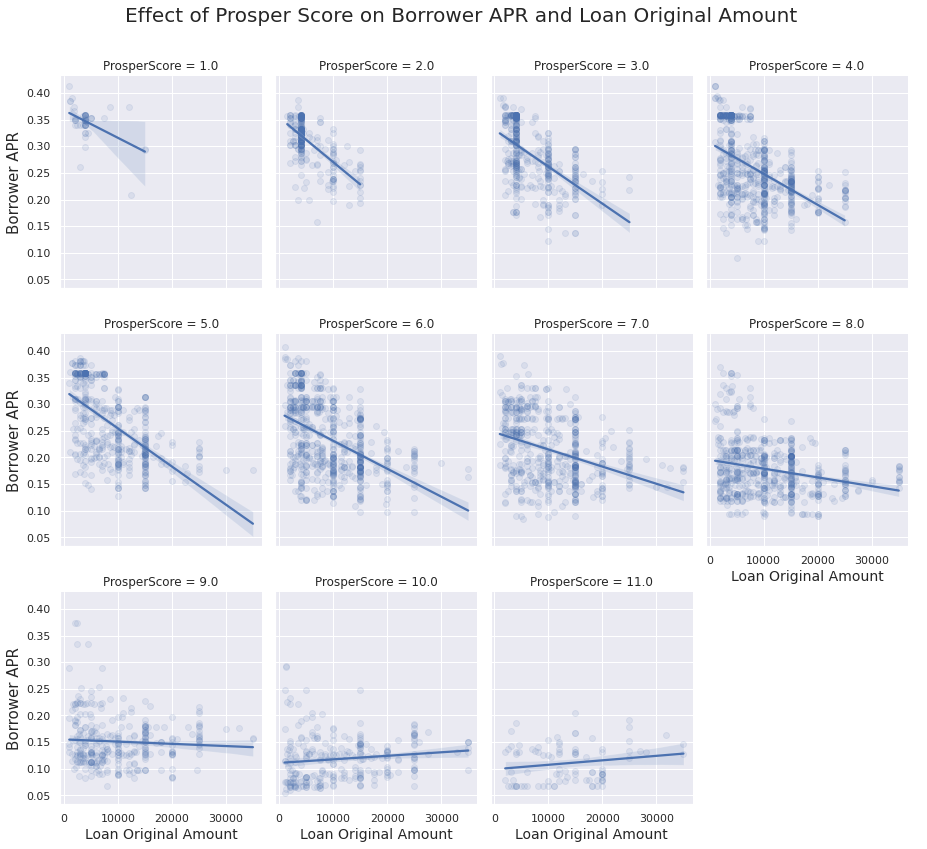

In [21]:
# Effect of Prosper Score on APR and Loan Original Amount

# defining size of plot
sb.set(rc = {'figure.figsize':(12,6)})

# drawing visualization
g=sb.FacetGrid(data=loans_sampled_df, aspect=0.8, height=4, col='ProsperScore', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

# set title position to top with padding of 0.9
g.fig.subplots_adjust(top=0.9)

##### adding axis labels and title

# X-axis label
g.set_axis_labels('Loan Original Amount', fontsize = 14)

# Y-axis labels
g.axes[0].set_ylabel('Borrower APR', fontsize = 15)
g.axes[4].set_ylabel('Borrower APR', fontsize = 15)
g.axes[8].set_ylabel('Borrower APR', fontsize = 15)

# title
g.fig.suptitle('Effect of Prosper Score on Borrower APR and Loan Original Amount', fontsize = 20);

#### **Insights from Visualization**

* The plots show that the Loan Original Amount increases with an increase in the Prosper Score and a decrease in Borrower APR (which is true by convention)
> * However, there is an interesting and surprising observation from the three features
> * When the Prosper Score is above 9 (best score/lowest risk) and the Loan Original Amount increases; there is an abnormal behaviour of the Borrower APR increasing
> * This can be explained in part by the propensity of people with better Prosper Scores borrowing bigger loans; which creates a high demand for the loans; and a corresponding increase in Borrower APR
> * The anomalous observation can be attributed to the maximizing on loan profits by the lenders, going by the Law of Supply and Demand

## Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [17]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: Part_II_Filename: No such file or directory
